In [24]:
import numpy as np
import matplotlib.pyplot as plt

In [4]:
#function: f(x) = x+y
#exact solution: (2e^x)-x-1 
#initial condition:y(0)=1 -> x_0=0, y_0=1
#stepsize: h = 0.1

#k1 = f(x_n,y_n)
#u_n+1 = y_n+(h*k_1)
#k2 = f(x_n+1,u_n+1)
#y_n+1 = y_n+(h*(1/2)*(k1+k2))

#Now we make two arrays, one array for the values of x and x+h (the stepsize)
#And one array to store those corresponding y values. starting with [x_0,y_0]

So what exactly am I trying to do here? Im trying to write an improved version of eulers method that we used before. This is supposed to be a more accurate. Instead of evaulating one slope at an estimated point this algorithm *averages* the slopes from that tangent point and the next tangent point. I think I have a cell that performs this task, with the weird shitty floating point arithmetic errors. That shit kinda sucks, since its giving me compoundingly incorrect answers from the examples im following, but that seems to just kinda be the nature of the game given what i got to work with.

I have a couple things I want to do with this notebook before moving on to Runge-Katta methods Namely, I want to:
    -Make the improved euler method into a modular function
    -Compare this function to the last, original euler method function from the euler method notebook by running the same examples. This is quality control and sanity check
    -Put the eulerMethod and improvedEulerMethod functions into a single library. I want to start compiling a library of everythin I make in order to use them later on in future projects.

So whats my ultimate goal right now? Like I was telling owen I think theres a way for us to use this stuff in game design. I want to potentially make a business out of it? Like rampart style? Where they saw an existing computational problem (secure communications) and are trying to innovate algorithms using true hard math to make something spectacularly more efficient. I think there are avenues to do this in the gaming industry, specifically with physics engines or efficient algorithms.

In [85]:
#This is the global interval value. I need to figure out how to make the ammount of points generated automated
#numberOfPoints = |interval|/stepSize ?

interval = 10
h=1

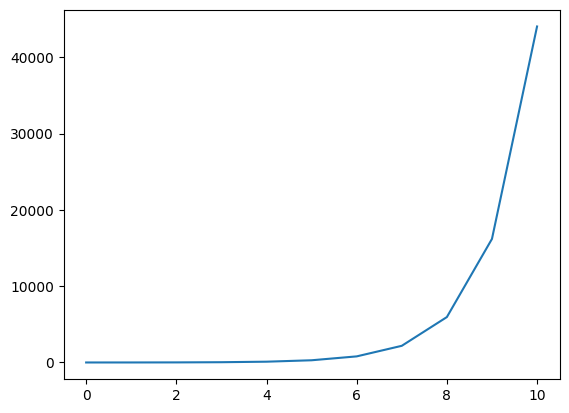

In [86]:
#should-be curve of the exact solution

def exact(x):
    return((2*math.exp(x))-x-1)

x_0 = 0
y_0 = exact(x_0)

xlast = x_0
ylast = y_0

exactx = np.array([x_0])
exacty = np.array([y_0])

for i in range(interval):
    xnext = xlast+h
    ynext=exact(xnext)
    
#     print(xnext)
#     print(ynext)
    
    exactx = np.append(exactx,xnext)
    exacty = np.append(exacty,ynext)
    
    xlast = xnext
    ylast = ynext
    
exact = plt.plot(exactx,exacty)

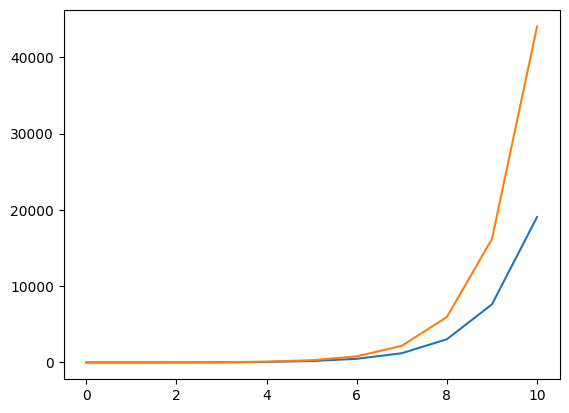

In [87]:
#Plot of should-be exact curve (orange) over the approximate curve (blue)
#We can still see that our approximate value is at all-points lower than that exact
#As you can imagine from the original euler method, as we decrease the step size we increase accuracy.
#Oh! I can compare this exact function, stepsize and interval with the original euler function to see if it infact is converging faster

def ftn(x,y):
    return(x+y)

x_0 = 0
y_0 = 1
initialPair = np.array([x_0,y_0])

# h = 0.1
# interval = 10

xlast = x_0
ylast = y_0

xlist = np.array([xlast])
ylist = np.array([ylast])

for i in range(interval):
    k1 = ftn(xlast,ylast)
    u_next = ylast+(h*k1)
    
    xnext = xlast+h
    xlist = np.append(xlist,xnext)
    k2 = ftn(xnext,u_next)
    ynext = ylast+(h*(1/2)*(k1+k2))
    ylist = np.append(ylist,ynext)
    
#     nextPair = np.array([xnext, ynext])
#     np.append(solutionPoints, nextPair, axis=0)
#     print(nextPair)
    
    xlast = xnext
    ylast = ynext
    

# print(xlist) 
# print(ylist)
approx = plt.plot(xlist, ylist)
exact = plt.plot(exactx,exacty)
    